In [2]:
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import os

In [3]:
DatasetTopPos = r'E:\GithubProjects\KagglePractice\Getam\Dataset'

In [4]:
len(os.listdir(DatasetTopPos))

700

In [5]:
def GetImages(TopPos):
	ReturnValue = []
	for file in os.listdir(TopPos):
		ReturnValue.append(np.array(PIL.Image.open(fr"{TopPos}\{file}")))
	return np.array(ReturnValue)

In [6]:
def GetLabels(TopPos):
	ReturnValue = []
	for file in os.listdir(TopPos):
		ReturnValue.append(file[0])
	return np.array(ReturnValue)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
TrainSet = GetImages(DatasetTopPos)
TrainSet.shape

(700, 40, 31)

In [9]:
Height, Width = TrainSet.shape[1], TrainSet.shape[2]
Width, Height

(31, 40)

데이터 개수, Width, Height  
RGB 채널은 없구나! 다행이다

In [10]:
TrainLabel = GetLabels(DatasetTopPos)
TrainLabel.shape

(700,)

In [11]:
TrainLabel

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', 'A', 'a', 'A', 'a', 'a', 'a', 'a', 'A', 'A',
       'A', 'A', 'a', 'A', 'a', 'a', 'A', 'a', 'A', 'A', 'A', 'a', 'b',
       'b', 'b', 'B', 'b', 'b', 'B', 'b', 'B', 'b', 'b', 'B', 'b', 'c',
       'C', 'C', 'c', 'C', 'C', 'C', 'C', 'c', 'C', 'c', 'C', 'c', 'C',
       'c', 'C', 'c', 'C', 'C', 'c', 'D', 'd', 'D', 'd', 'd', 'D

In [12]:
sorted(list(set(TrainLabel)))

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

아하 대충  
0 ~ 9  
a ~ z  
A ~ Z  
가 있구나

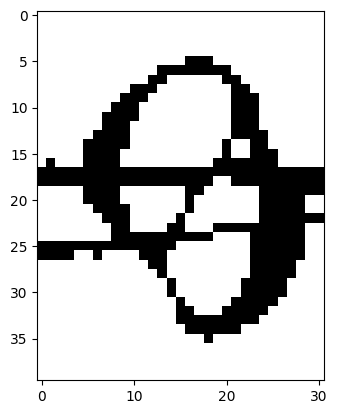

'0'

In [13]:
plt.imshow(TrainSet[0], cmap = plt.cm.binary)
plt.show()
TrainLabel[0]

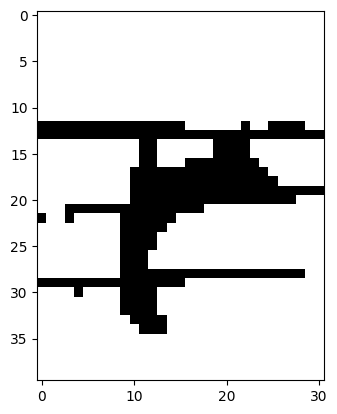

'r'

In [14]:
plt.imshow(TrainSet[500], cmap = plt.cm.binary)
plt.show()
TrainLabel[500]

Reshape 할 시간

In [15]:
TrainSet.shape

(700, 40, 31)

In [16]:
TrainSet = TrainSet.reshape((700, 40 * 31))

In [17]:
TrainSet.shape

(700, 1240)

In [18]:
np.unique(TrainSet)

array([  0, 255], dtype=uint8)

0 과 255 밖에 없구나  
0 과 1 로 변경해주자

In [19]:
TrainSet = TrainSet / 255

In [20]:
TrainSet = TrainSet.astype('float32')

In [21]:
np.unique(TrainSet)

array([0., 1.], dtype=float32)

In [22]:
np.unique(TrainLabel)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [23]:
MapObj = { x:i for i, x in enumerate(np.unique(TrainLabel))}

def to_categorical(Data):
	ReturnObj = []

	ObjLen = len(MapObj)
	for label in Data:
		Temp = np.array([0. for _ in range(ObjLen)])
		Temp[MapObj[label]] = 1.
		ReturnObj.append(Temp)
	return np.array(ReturnObj)

In [24]:
TrainLabel = to_categorical(TrainLabel).astype('float32')

In [25]:
TrainLabel

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [26]:
TrainLabel.shape

(700, 62)

In [27]:
from keras import models
from keras import layers

In [28]:
Width * Height

1240

1240 : 입력

In [29]:
TrainLabel.shape

(700, 62)

62 : 출력

In [30]:
model = models.Sequential([
	layers.Dense(512, activation = 'relu', input_shape = (1240, )),
	layers.Dense(256, activation = 'relu',),
	layers.Dense(128, activation = 'relu',),
	layers.Dense(64, activation = 'relu',),

	layers.Dense(62, activation = 'softmax',), # 숫자가 10개이므로 저렇게 함 / softmax 는 좀 공부하기로
])

In [31]:
model.compile(
	optimizer = 'rmsprop',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

In [32]:
model.fit(TrainSet, TrainLabel, epochs = 10, batch_size = 128)

Epoch 1/10
6/6 [==============================] - 1s 14ms/step - loss: 3.7875 - accuracy: 0.1114
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 2.7700 - accuracy: 0.3729
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 1.5441 - accuracy: 0.6829
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.8433 - accuracy: 0.8414
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.1954 - accuracy: 0.9900
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 1.0000


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               635392    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 62)                4030      
                                                                 
Total params: 811,902
Trainable params: 811,902
Non-trainable params: 0
_________________________________________________________________


In [34]:
MapObjSwap = dict([(value, key) for key, value in MapObj.items()])

def PredictArrayToNum(Prediction):
	MaxPercent = 0
	Result = "?"
	for i, Percent in enumerate(Prediction):
		if Percent > MaxPercent:
			MaxPercent = Percent
			Result = MapObjSwap[i]
	return (Result, MaxPercent)

def PredictIt(Images, Labels, Num):
	MapObj.get('')
	plt.imshow(Images[Num].reshape(Height,Width), cmap = plt.cm.binary)
	Prediction = model.predict(np.array(
		[ Images[Num] ]
	))
	return (PredictArrayToNum(Prediction.tolist()[0]),
			PredictArrayToNum(Labels[Num]))

In [35]:
def GetPredictText(TupleValue):
	print(f"예측 : {TupleValue[0][0]} - {TupleValue[0][1] * 100}% / 정답 : {TupleValue[1][0]}")

1/1 [==============================] - 0s 131ms/step
예측 : 6 - 99.82507824897766% / 정답 : 6


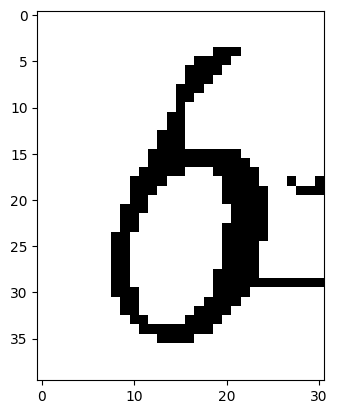

In [36]:
GetPredictText(PredictIt(TrainSet, TrainLabel, 77))

In [37]:
import random

1/1 [==============================] - 0s 24ms/step
예측 : s - 98.69406819343567% / 정답 : s


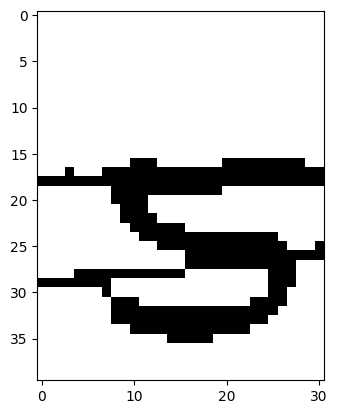

In [38]:
GetPredictText(PredictIt(TrainSet, TrainLabel, random.randint(0, len(TrainSet)-1)))

In [39]:
model.evaluate(TrainSet, TrainLabel)

22/22 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000


[0.0041580041870474815, 1.0]

이제 Train, Test 나눠서 테스트해보자

In [40]:
TrainSet, TestSet, TrainLabel, TestLabel = train_test_split(
	TrainSet,
	TrainLabel,
	test_size = 0.2,
	random_state = 123,
)

In [41]:
len(TrainSet), len(TestSet)

(560, 140)

이제 모델을 리셋시켜주자

In [47]:
model = models.Sequential([
	layers.Dense(512, activation = 'relu', input_shape = (1240, )),
	layers.Dense(256, activation = 'relu',),
	layers.Dense(128, activation = 'relu',),
	layers.Dense(64, activation = 'relu',),

	layers.Dense(62, activation = 'softmax',), # 숫자가 10개이므로 저렇게 함 / softmax 는 좀 공부하기로
])

In [48]:
model.compile(
	optimizer = 'rmsprop',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

In [49]:
model.fit(TrainSet, TrainLabel, epochs = 10, batch_size = 128)

Epoch 1/10
5/5 [==============================] - 1s 14ms/step - loss: 3.9386 - accuracy: 0.0786
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 2.9269 - accuracy: 0.3536
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 1.8721 - accuracy: 0.5857
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.8645 - accuracy: 0.8589
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.3703 - accuracy: 0.9536
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0704 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0326 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0084 - accuracy: 1.0000


In [53]:
model.evaluate(TestSet, TestLabel)

5/5 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 1.0000


[0.017607785761356354, 1.0]

오 정확도가 100% 나왔다!